# Illustrate the Central Limit Theorem using a die
## Variance

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats

sns.set_theme()

In [2]:
# Simulate 10000 dice rolls and store them in a matrix (1 row per sequence).
W = stats.randint.rvs(low=1, high=7, size=(1000,10), random_state=56658)

In [3]:
# Compute the row-wise mean
# With keepdims=True, the dimensions are preserved. The result is therefore a (1000 × 1) matrix.
MW = np.mean(W, axis=1, keepdims=True)

In [4]:

# Subtract the row-wise mean
# then square element-wise
# and sum row-wise
# and divide by n - 1
s2 = np.sum((W - MW)**2, axis=1) / (10-1)

In [5]:
# Mean of the 1000 estimates
np.mean(s2)

np.float64(2.9513000000000003)

In [6]:
# Calculation with the intuitive factor 1/n
np.mean(np.sum((W - MW)**2, axis=1) / (10))

np.float64(2.65617)

If you use a factor of 1/n instead of 1/(n−1), the estimates will on average be off by a factor of (n−1)/n — for n = 10, this means they are about 10% too small.

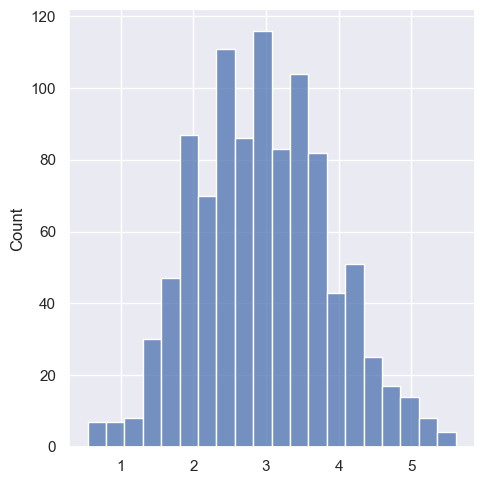

In [7]:
# Histogram
sns.displot(s2)

In [8]:
# You can also compute the variance directly using NumPy
np.var(W, axis=1)

array([1.6 , 1.89, 2.16, 2.29, 3.44, 3.65, 2.01, 3.01, 3.04, 1.76, 3.09,
       2.21, 3.2 , 2.36, 4.04, 1.41, 1.56, 3.41, 2.16, 3.56, 1.29, 4.84,
       1.76, 2.04, 3.29, 1.84, 2.05, 3.49, 2.81, 3.65, 1.6 , 3.01, 2.41,
       1.76, 3.56, 1.49, 1.96, 3.8 , 2.84, 3.49, 2.64, 2.6 , 3.44, 2.85,
       3.09, 2.05, 1.76, 2.41, 2.64, 2.45, 2.61, 1.81, 2.04, 2.16, 2.81,
       2.89, 3.16, 2.36, 2.84, 2.65, 2.89, 2.16, 2.84, 1.4 , 2.44, 2.44,
       3.49, 1.41, 3.4 , 0.64, 2.41, 2.76, 2.65, 1.69, 2.21, 2.49, 1.76,
       1.64, 3.61, 3.36, 2.61, 1.69, 1.25, 1.76, 2.89, 3.  , 2.84, 2.69,
       3.96, 1.69, 3.04, 2.89, 3.41, 2.56, 3.65, 2.4 , 2.96, 3.76, 1.96,
       2.29, 3.01, 5.05, 1.69, 2.21, 3.41, 2.  , 2.89, 3.29, 1.2 , 2.41,
       1.61, 3.61, 1.84, 1.41, 2.56, 3.41, 1.56, 1.76, 2.21, 5.04, 2.81,
       2.96, 2.56, 2.45, 2.01, 1.8 , 4.29, 2.49, 3.05, 4.49, 2.4 , 3.76,
       2.76, 2.16, 2.  , 2.8 , 2.69, 1.96, 2.25, 2.64, 2.8 , 2.6 , 3.6 ,
       1.8 , 3.81, 3.01, 4.25, 2.65, 2.09, 2.41, 2.

In [9]:
# NumPy uses the prefactor 1/n by default
# ddof=1 gives the result with the prefactor 1/(n-1)

np.var(W, axis=1, ddof=1)

array([1.77777778, 2.1       , 2.4       , 2.54444444, 3.82222222,
       4.05555556, 2.23333333, 3.34444444, 3.37777778, 1.95555556,
       3.43333333, 2.45555556, 3.55555556, 2.62222222, 4.48888889,
       1.56666667, 1.73333333, 3.78888889, 2.4       , 3.95555556,
       1.43333333, 5.37777778, 1.95555556, 2.26666667, 3.65555556,
       2.04444444, 2.27777778, 3.87777778, 3.12222222, 4.05555556,
       1.77777778, 3.34444444, 2.67777778, 1.95555556, 3.95555556,
       1.65555556, 2.17777778, 4.22222222, 3.15555556, 3.87777778,
       2.93333333, 2.88888889, 3.82222222, 3.16666667, 3.43333333,
       2.27777778, 1.95555556, 2.67777778, 2.93333333, 2.72222222,
       2.9       , 2.01111111, 2.26666667, 2.4       , 3.12222222,
       3.21111111, 3.51111111, 2.62222222, 3.15555556, 2.94444444,
       3.21111111, 2.4       , 3.15555556, 1.55555556, 2.71111111,
       2.71111111, 3.87777778, 1.56666667, 3.77777778, 0.71111111,
       2.67777778, 3.06666667, 2.94444444, 1.87777778, 2.45555

By the way, it's the other way around in Pandas. There, the default is ddof=1.